# PCA

### Reading the MNIST file in


In [2]:
import os
import struct
import numpy as np
def read (path="."):
                                    
    fname_img = os.path.join(path, 'train-images.idx3-ubyte')
    fname_label = os.path.join(path, 'train-labels.idx1-ubyte')
    
    '''
        [offset] [type]          [value]          [description]
        0000     32 bit integer  0x00000803(2051) magic number
        0004     32 bit integer  60000            number of images
        0008     32 bit integer  28               number of rows
        0012     32 bit integer  28               number of columns
        0016     unsigned byte   ??               pixel
        0017     unsigned byte   ??               pixel
        ........
        xxxx     unsigned byte   ??               pixel
    '''
    
    with open(fname_img, 'rb') as img_file:
        # >IIII : Big-Endian unsigned Integers. 4 bytes each
        magic, num, rows, cols = struct.unpack(">IIII", img_file.read(16))
        imgs = np.fromfile (img_file, dtype=np.uint8).reshape(num, rows, cols)
    
    '''
        [offset] [type]          [value]          [description]
        0000     32 bit integer  0x00000801(2049) magic number (MSB first)
        0004     32 bit integer  10000            number of items
        0008     unsigned byte   ??               label
        0009     unsigned byte   ??               label
        ........
        xxxx     unsigned byte   ??               label
    '''
    
    
    with open(fname_label, 'rb') as lbl_file:
        magic, num = struct.unpack('>II', lbl_file.read(8))
        lbls = np.fromfile(lbl_file, dtype=np.int8)
        
    get_img = lambda idx: (lbls[idx], imgs[idx])
    
    for i in range(1,len(lbls)):
        yield get_img(i)        
        

In [3]:
%matplotlib inline

In [4]:
def show_image(img):
    from matplotlib import pyplot
    import matplotlib as mpl
    
    print (img.shape)
    fig = pyplot.figure()
    ax = fig.add_subplot(1,1,1)

    imgplot = ax.imshow(img, cmap="gray")
    imgplot.set_interpolation('nearest')
    ax.xaxis.set_ticks_position('top')
    ax.yaxis.set_ticks_position('left')
    pyplot.show()


In [5]:
if __name__=="__main__":
    images = read("/home/abhay/WORK/ML/MNIST/DATA/")
    zeroImages = []
    for img in images:
        if img[0] == 0:
            zeroImages.append(img[1])
    anarr = []
    for zero_img in zeroImages:
        anarr.append(np.reshape(zero_img,(28*28,1)))
    
    final_arr_of_zeros = np.hstack(anarr)
    mean_arr = np.reshape(np.mean(final_arr_of_zeros, axis = 1), (28*28,1))
    #print (anarr[3] - mean_arr)
    
    N = len(zeroImages)
    cov_mat = np.zeros((784,784))
    
    for X in anarr:
        X = X - mean_arr
        prod = np.dot(X,X.T)
        cov_mat = cov_mat + prod
    cov_mat = cov_mat/ (N-1)
    

In [8]:
    (eigVals,eigVecs) = np.linalg.eig(cov_mat)
    

In [67]:
    M = 7
    arr = eigVals.argsort()[::-1][:M]
    print (arr)
    eigs = eigVecs[arr]
    print (eigs.shape)
#     impEigVecs = eigVals[arr[-10:]])

[0 1 2 3 4 5 6]
(7, 784)


In [68]:
    X = anarr [20]
    yn = np.dot(eigs, (X - mean_arr))
    
    Xapprox = mean_arr + np.dot(eigs.T, yn)
    print (Xapprox.shape)

(784, 1)


In [69]:
    final_img = (np.reshape(Xapprox,(28,28))).astype(int)

/home/abhay/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: ComplexWarning: Casting complex values to real discards the imaginary part
  if __name__ == '__main__':


(28, 28)


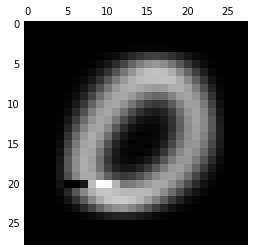

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   1   2   3   3   4   4   3
    2   2   1   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   1   3   7  14  25  39  52  63  66  61
   49  36  21  10   4   1   0   0   0   0]
 [  0   0   0   0   0   0   0   1   4  11  24  43  69  99 125 143 150 140
  118  89  57  31  13   3   0   0   0   0]
 [  0   0   0   0   0   0   1   4  12  27  51  83 117 149 172 187 192 188
  171 139 101  62  30   9   1   0   0   0]
 [  0   0   0   0   0   1   3  10  25  51  85 121 152 173 184 188 189 192
  188 170 137  95  54  20   3   0   0   0]
 [  0   0   0   0   0   1   7  20  46  80 118 150 169 172 166 15

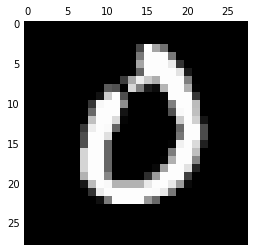

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  70 255 165 114
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 122 253 253 253
  120   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 165 253 253 253
  234  52   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  99 253 253 253
  253 228  26   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  60 168 238 202 174 253
  253 253 127   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  91  81   1 215 128  2

In [70]:
    
    show_image (final_img)
    
    print(final_img)
    actual = np.reshape(X,(28,28))
    show_image (actual)
    print (actual)